# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
########################################
# Change path to run on machine.  
########################################

#df = pd.read_csv('data/human_body_temperature.csv')
df = pd.read_csv('C:\\Users\\Bill\\human_temp\\data\\human_body_temperature.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


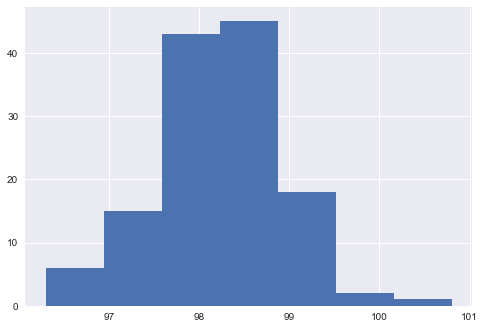

In [6]:
plt.hist(df.temperature,bins=7)
plt.show()

In [7]:
np.random.seed(42)

Question 1:  Is the data normal?

Answer: No.  A visual inspection varying bin size show a consistent difference in the shape of the left and righ tails.




Question 2: Is the sample size large? Are the observations independent?

There are 65 male and 65 female observations.  In both cases, n>30. The description of the measurement methodology is not given, so I assume each observation is a separate subject (rather than multiple measurements of the same person) and that the instrumentation is well calibrated and in good working order.  With these conditions, the data can be assumed to be independent and the CLT holds true.

    Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 

In [8]:
print df.loc[df.gender=='F',:].count()
print df.loc[df.gender=='M',:].count()

temperature    65
gender         65
heart_rate     65
dtype: int64
temperature    65
gender         65
heart_rate     65
dtype: int64


Q3:  Is the true population mean really 98.6 degrees F?

It is unlikely that the true population mean is 98.6.  For women the z score indicates a 98.8% confidence and for men, it is significantly higher.  See next cell.  Applying the T test with 35 degrees of freedom yields a 99% confidence and significantly higher for men that the sample mean in NOT 98.6 for either men or women.


In [9]:
def zscore(target_mean,data):
    '''data is received in np array'''
    sample_mean=np.mean(data)
    zscore=(sample_mean-target_mean)/(np.std(data)/np.sqrt(len(data)))
    return zscore

print "Mean temp for women is %5.2f"%df.loc[(df.gender=='F'),"temperature"].mean()," with a Zscore of",zscore(98.6,df.loc[(df.gender=='F'),"temperature"])
print "Mean temp for men is %5.2f"%df.loc[(df.gender=='M'),"temperature"].mean()," with a Zscore of",zscore(98.6,df.loc[(df.gender=='M'),"temperature"])
    

Mean temp for women is 98.39  with a Zscore of -2.25289521427
Mean temp for men is 98.10  with a Zscore of -5.7602387229


Q4)  Draw a small sample of size 10 from the data and repeat both tests.
The ztest for women gives lower but still confidence hat the same mean is not 98.6 degrees.  For women it is 91.6% and men it is 94.2% confidence.

The T test shows a 90% confidence for women and something between 90% and 95% confidence for men that the mean is not 98.6 for the sample.  In this case, the T test is more appropriate because the number of observations is so small.


In [28]:
#Split DF into gender
just_women_df=df.loc[(df.gender=='F'),"temperature"]
just_men_df=df.loc[(df.gender=='M'),"temperature"]

women_resampled=np.empty(10)
men_resampled=np.empty(10)

women_resampled=np.random.choice(just_women_df,10)
men_resampled=np.random.choice(just_men_df,10)

print "Resampled case, 10 observations each gender"
print "Mean temp for women is %5.2f"%np.mean(women_resampled)," with a Zscore of %5.2f"%zscore(98.6,women_resampled)
print "Mean temp for men is %5.2f"%np.mean(men_resampled)," with a Zscore of %5.2f"%zscore(98.6,men_resampled)

Resampled case, 10 observations each gender
Mean temp for women is 98.70  with a Zscore of  0.49
Mean temp for men is 98.37  with a Zscore of -1.09


Q5) At what temperature should we consider someone's temperature to be "abnormal"?

For discussion, assume an abnomal temperature would be outside the standard whiskers on a Box and Whiskers plot, or, +/1 1.5 * IQR.  The cell below calculates appropriate highs and lows for women and men.  For simplicity, women's temperatures should be considered abnormal if outside the range: 97.2-99.6 and men outside the range 96.6-99.6.  It is also important to note that the shape of the tails was different, and the the female population had a larger number of outliers
 

Women mean:  98.4 wih a standard deviation of:   0.7
Women IQR: [ 98.   98.8]
Women abnormal high:  99.6
Women abnormal low:  97.2

Men mean:  98.1 wih a standard deviation of:   0.7
Men IQR: [ 97.6  98.6]
Men abnormal high:  99.6
Men abnormal low:  96.6


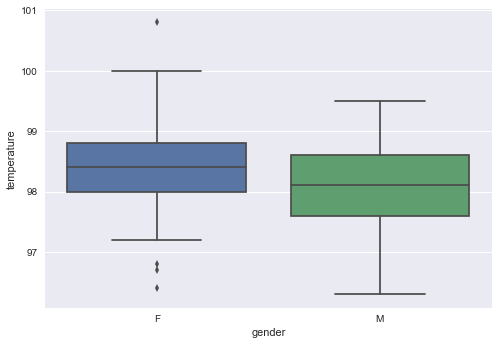

In [33]:
women_mean=np.mean(just_women_df)
women_std=np.std(just_women_df)
print "Women mean: %5.1f" % women_mean, "wih a standard deviation of: %5.1f" % women_std
print "Women IQR:",np.percentile(just_women_df,[25,75])
iqr_temp=np.percentile(just_women_df,75)-np.percentile(just_women_df,25)
print "Women abnormal high: %5.1f" % (women_mean+1.5*iqr_temp)
print "Women abnormal low: %5.1f" % (women_mean-1.5*iqr_temp)

men_mean=np.mean(just_men_df)
men_std=np.std(just_women_df)
print "\nMen mean: %5.1f" % men_mean, "wih a standard deviation of: %5.1f" % men_std
print "Men IQR:",np.percentile(just_men_df,[25,75])
miqr_temp=np.percentile(just_men_df,75)-np.percentile(just_men_df,25)
print "Men abnormal high: %5.1f" % (men_mean+1.5*miqr_temp)
print "Men abnormal low: %5.1f" % (men_mean-1.5*miqr_temp)

sns.boxplot(x="gender",y="temperature",data=df)
plt.show()

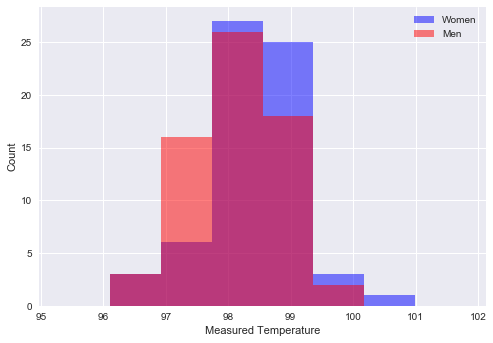

In [43]:
bins = np.linspace(df.temperature.min()-1, df.temperature.max()+1, 9)

plt.hist(just_women_df,bins,alpha=0.5, label='Women',color='b')
plt.hist(just_men_df,bins,alpha=0.5, label='Men',color='r')
plt.xlabel("Measured Temperature")
plt.ylabel("Count")
plt.legend(loc='best')

plt.show()

Q6) Is there a significant difference between males and females in normal temperature?

In testing 130 subjects, half men and half women, women's mean temperture was slightly higher than men (by 0.3F), and had ouliers on the high side of the distribution.  While the standard deviation is the same, the spread of the distribution is different, and though the "abnormal" levels on the high side are mathematically the same, it is likely that a screen at 99.6 degrees will generate more false positives for illness in women than in men.
